# Electrode Microwave Region 5 rods Vacuum Chamber

**Maxwell file**
```
Electric Field Rods Field Shaping Optimization - 5 Rods vacuum chamber
```

![drawing](5rods_vacchamber_drawing.PNG)

simulate potential and electric field for the configuration shown in the figure.  
The separation between left and right electrodes was varied as was the positioning of **R1** and **SEP1** and the voltage on SEP1, **Vsep**.   
The electric field inhomogeneity in the center rectangle was used as the cost function for minimization.

The microwaves are in the 10s GHz range, so I took a minimum separation beteween electrode rods of 3 cm, corresponding to 10 GHz.

  * electrode rods at $\pm$1000 V
  * center rods at 0 V
  * rod radius = 1 mm
  * boundary conditions are 0 V at the vacuum chamber  


In [1]:
def set_fontsize(ax, fs):
    """
    Function to set font sizes for axes objects
    """
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

## Parametric Sweep

In [2]:
from scipy.interpolate import griddata
import numpy as np
def generate_gridded_interpolate(x, y, data, method = 'cubic'):
    xi = np.linspace(x.min(), x.max(), 101)
    yi = np.linspace(y.min(), y.max(), 101)
    xx, yy = np.meshgrid(xi, yi)
    return xx, yy, griddata((x,y), data, xi = (xx,yy), method = method)


def string_to_num(df, colname, remove = False):
    if not remove:
        df[colname] = pd.to_numeric(df[colname]) 
    else:
        df[colname] = [float(val.strip(remove)) for val in df[colname].values]

In [3]:
import pandas as pd

data_dir = '../Data/Ansys/'

df_para = pd.read_csv(data_dir+'ParametricSetup1_Result_5rods_vacchamber.csv')
string_to_num(df_para, '$R1', remove = 'mm')
string_to_num(df_para, '$R2', remove = 'mm')
string_to_num(df_para, '$SEP', remove = 'mm')
string_to_num(df_para, '$SEP2', remove = 'mm')
string_to_num(df_para, '$Vsep', remove = 'V')
df_para = df_para.rename(columns = {'fmin: None':'Cost'})
df_para.head()

,Variation,$R1,$R2,$SEP,$SEP2,$Vsep,Cost
0,1933,30.0,50.0,80.0,40.0,500.0,0.000603
1,1574,30.0,50.0,70.0,40.0,650.0,0.000675
2,1215,30.0,50.0,60.0,40.0,800.0,0.001228
3,1020,50.0,40.0,50.0,40.0,800.0,0.001541
4,1679,40.0,60.0,70.0,40.0,650.0,0.001552


In [4]:
df_sorted = df_para.sort_values('Cost')

In [5]:
df_sorted.iloc[:10]

,Variation,$R1,$R2,$SEP,$SEP2,$Vsep,Cost
0,1933,30.0,50.0,80.0,40.0,500.0,0.000603
1,1574,30.0,50.0,70.0,40.0,650.0,0.000675
2,1215,30.0,50.0,60.0,40.0,800.0,0.001228
3,1020,50.0,40.0,50.0,40.0,800.0,0.001541
4,1679,40.0,60.0,70.0,40.0,650.0,0.001552
5,1590,30.0,60.0,70.0,40.0,800.0,0.002234
6,1320,40.0,60.0,60.0,40.0,800.0,0.002473
7,1304,40.0,50.0,60.0,40.0,650.0,0.002629
8,2038,40.0,60.0,80.0,40.0,500.0,0.002748
9,1394,50.0,50.0,60.0,40.0,650.0,0.003108


## Optimization

In [6]:
df_opt = pd.read_csv(data_dir+'OptimizationSetup1_Result_5rods_vacchamber.csv')
string_to_num(df_opt, '$R1', remove = 'mm')
string_to_num(df_opt, '$R2', remove = 'mm')
string_to_num(df_opt, '$SEP', remove = 'mm')
string_to_num(df_opt, '$SEP2', remove = 'mm')
string_to_num(df_opt, '$Vsep', remove = 'V')

In [7]:
df_sorted = df_opt.sort_values('Cost')
df_sorted.head(10)

,Evaluation,$R1,$R2,$SEP,$SEP2,$Vsep,Cost
146,147,30.341011,52.151004,52.645314,38.684467,890.431121,9.616900e-08
135,136,30.337398,52.150694,52.635148,38.707627,890.431121,1.138800e-07
137,138,30.325485,52.150694,52.650650,38.707627,890.431121,1.142300e-07
139,140,30.325485,52.150694,52.635148,38.707627,890.675835,1.142300e-07
143,144,30.325485,52.150694,52.635148,38.700626,890.431121,1.142700e-07
124,125,30.325485,52.150694,52.635148,38.707627,890.431121,1.199500e-07
144,145,30.325485,52.150694,52.635148,38.707627,890.186407,1.226300e-07
142,143,30.325485,52.150694,52.619645,38.707627,890.431121,1.235800e-07
138,139,30.325485,52.150694,52.635148,38.714629,890.431121,1.239000e-07
140,141,30.313573,52.150694,52.635148,38.707627,890.431121,1.248600e-07


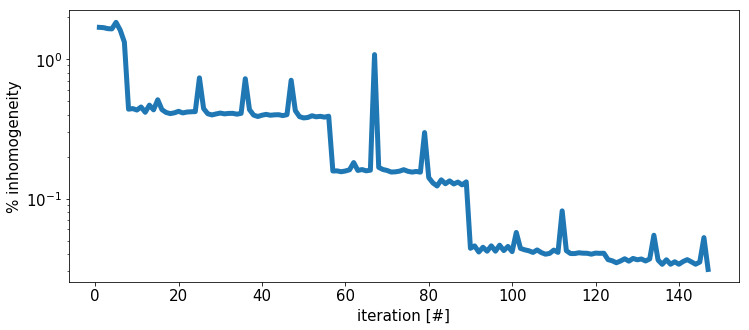

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(df_opt.Evaluation, np.sqrt(df_opt.Cost)*100, lw = 5)
set_fontsize(ax, 15)
ax.locator_params(axis = 'y', nbins = 5)
ax.set_xlabel('iteration [#]')
ax.set_yscale('log')
ax.set_ylabel('% inhomogeneity');

Parameters for which the inhomogeneity is minimized

In [9]:
df_opt.iloc[df_opt.Cost.idxmin()]

Evaluation    1.470000e+02
$R1           3.034101e+01
$R2           5.215100e+01
$SEP          5.264531e+01
$SEP2         3.868447e+01
$Vsep         8.904311e+02
Cost          9.616900e-08
Name: 146, dtype: float64

## Loading the potential

In [10]:
def load_fld_potential(fname, data_dir = data_dir):
    names = ['x', 'y', 'z', 'V']
    df = pd.read_csv(data_dir+fname, skiprows = 2, header = None, delim_whitespace = True,
                     names = names)
    return df

In [11]:
potential = load_fld_potential('potential_5rods_vacchamber.fld')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [12]:
potential.head()

,x,y,z,V
0,-0.07,-0.07000,0.0,Nan
1,-0.07,-0.06975,0.0,Nan
2,-0.07,-0.06950,0.0,Nan
3,-0.07,-0.06925,0.0,Nan
4,-0.07,-0.06900,0.0,Nan


## Plotting Potential

In [13]:
def calculate_aspect(x,y):
    return (y.ptp()/x.ptp())/(np.unique(y).size/np.unique(x).size)

In [14]:
def generate_gridded(x, y, data):
    xx, yy = np.meshgrid(np.unique(x), np.unique(y))
    x_vals, x_ind = np.unique(x, return_inverse = True)
    y_vals, y_ind = np.unique(y, return_inverse = True)
    data_array = np.empty(x_vals.shape + y_vals.shape)
    data_array.fill(np.nan)
    data_array[x_ind, y_ind] = data
    return xx, yy, data_array.T

In [15]:
xx, yy, potential_array = generate_gridded(potential.x, 
                                           potential.y, 
                                           potential.V)

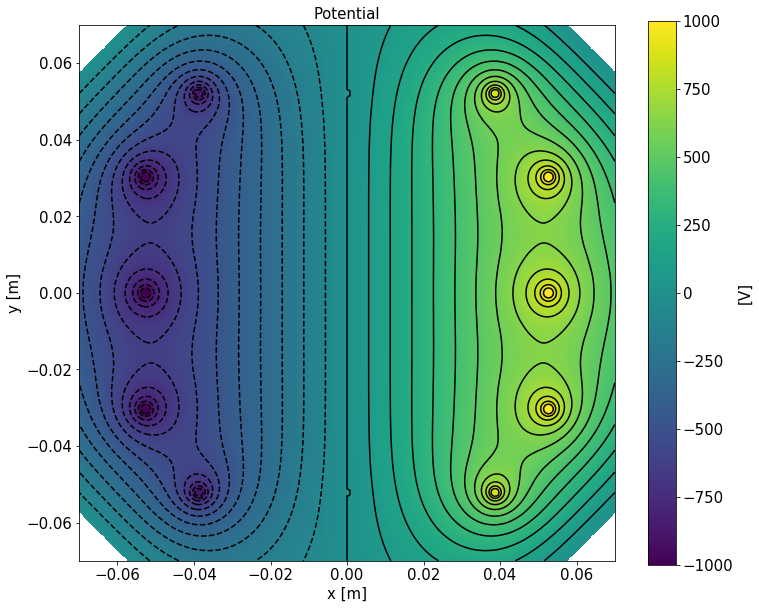

In [16]:
fig, ax = plt.subplots(figsize = (12,10))
ax.set_aspect(calculate_aspect(xx,yy))
pc = ax.pcolormesh(xx, yy, potential_array)
ax.contour(xx,yy,potential_array, 30, colors = 'k')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Potential')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

In [17]:
xc, yc = np.array(xx.shape)//2

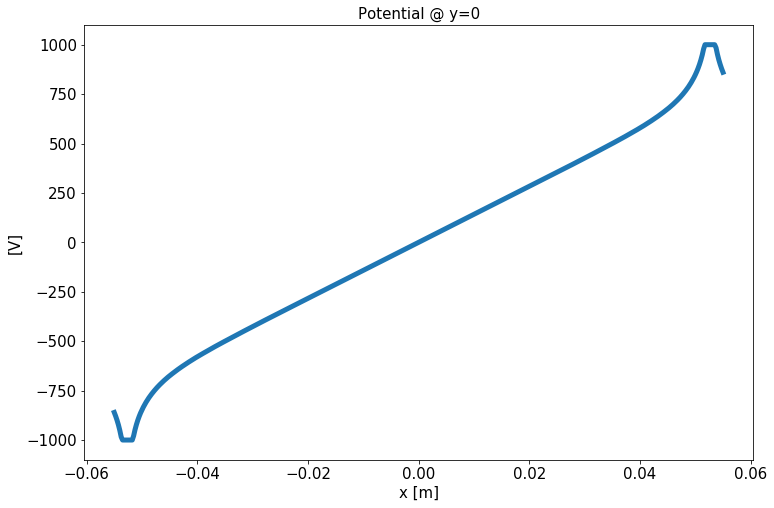

In [18]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title(r'Potential @ y=0')
ax.plot(xx[xc,60:-60], potential_array[xc,60:-60], lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('[V]');

## Loading Electric Field

In [19]:
def load_fld_field(fname, data_dir = data_dir):
    names = ['x', 'y', 'z', 'Ex', 'Ey', 'Ez']
    df = pd.read_csv(data_dir+fname, skiprows = 2, header = None, 
                     delim_whitespace = True, names = names)
    return df

In [20]:
field = load_fld_field('field_5rods_vacchamber.fld')
field.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,x,y,z,Ex,Ey,Ez
0,-0.07,-0.07000,0.0,Nan,Nan,Nan
1,-0.07,-0.06975,0.0,Nan,Nan,Nan
2,-0.07,-0.06950,0.0,Nan,Nan,Nan
3,-0.07,-0.06925,0.0,Nan,Nan,Nan
4,-0.07,-0.06900,0.0,Nan,Nan,Nan


## Generating Gridded Field

In [21]:
xx, yy, Ex = generate_gridded(field.x.values, 
                              field.y.values, 
                              field.Ex.values)
_, _, Ey = generate_gridded(field.x.values, 
                            field.y.values, 
                            field.Ey.values)
Emag = np.sqrt(Ex**2+Ey**2)

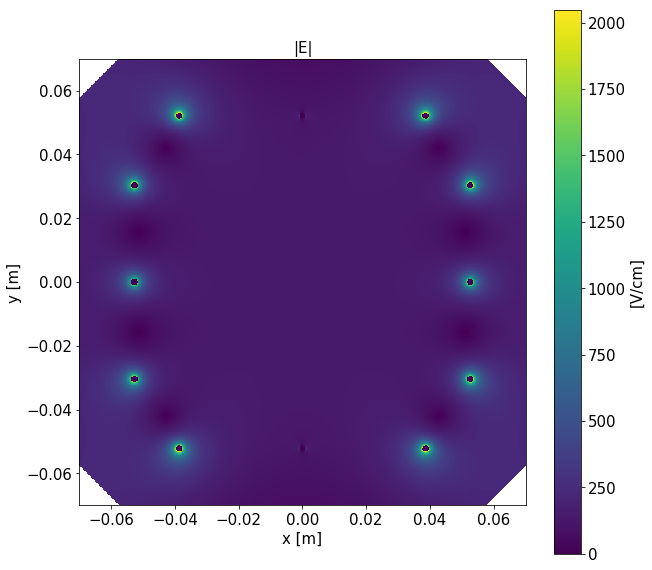

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect(calculate_aspect(xx,yy))
pc = ax.pcolormesh(xx, yy, Emag/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('|E|')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

In [23]:
xc, yc = np.array(xx.shape)//2

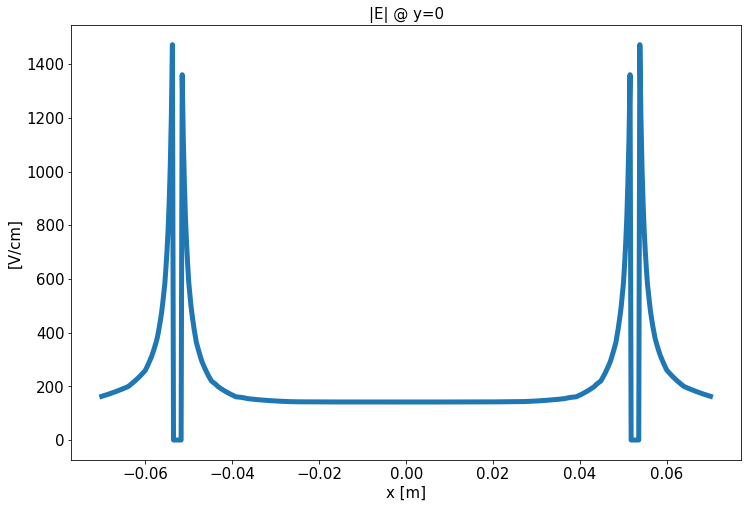

In [24]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title(r'|E| @ y=0')
ax.plot(xx[xc,:], Emag[xc,:]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('[V/cm]');

## Zooming to beam region

In [25]:
potential_center = load_fld_potential('potential_5rods_vacchamber_center.fld')
field_center = load_fld_field('field_5rods_vacchamber_center.fld')

In [26]:
xx, yy, potential_array = generate_gridded(potential_center.x, 
                                           potential_center.y, 
                                           potential_center.V)

In [27]:
xx, yy, Ex = generate_gridded(field_center.x.values, 
                              field_center.y.values, 
                              field_center.Ex.values)
_, _, Ey = generate_gridded(field_center.x.values, 
                            field_center.y.values, 
                            field_center.Ey.values)
Emag = np.sqrt(Ex**2+Ey**2)

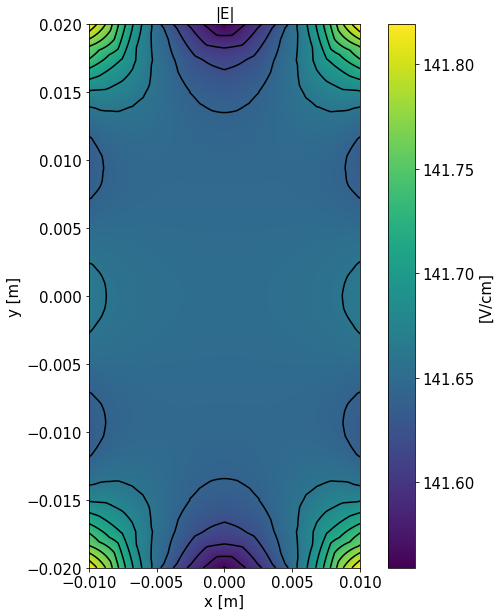

In [28]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Emag/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Emag, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('|E|')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

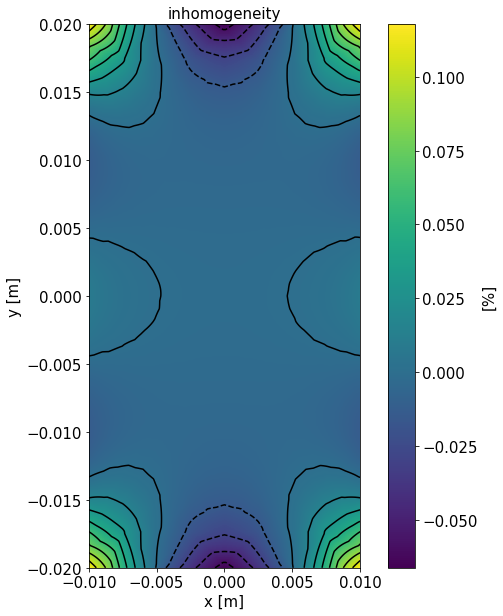

In [29]:
inhomogeneity = 100*(Emag-Emag.mean())/Emag.mean()
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, inhomogeneity)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,inhomogeneity, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('inhomogeneity')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[%]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

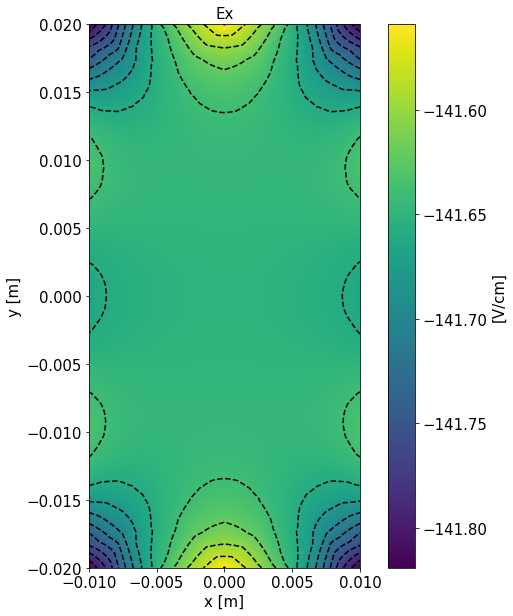

In [30]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Ex/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Ex, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('Ex')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

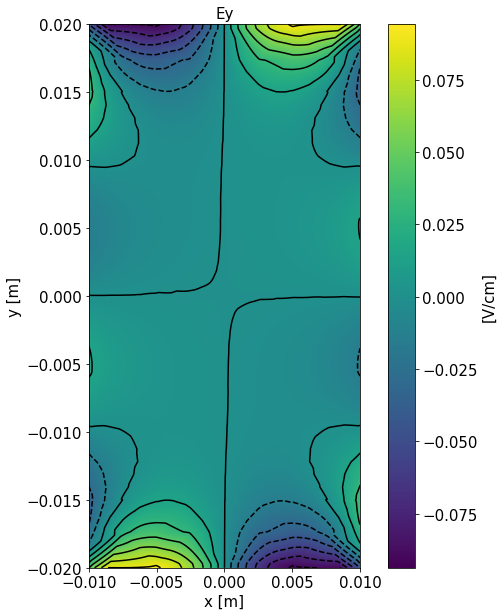

In [31]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Ey/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Ey, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('Ey')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

In [32]:
xc, yc = np.array(xx.shape)//2

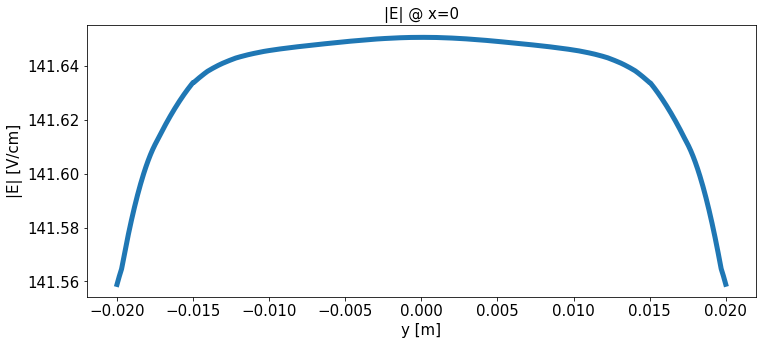

In [33]:
fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'|E| @ x=0')
ax.plot(yy[:,yc], Emag[:,yc]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('y [m]')
ax.set_ylabel('|E| [V/cm]');

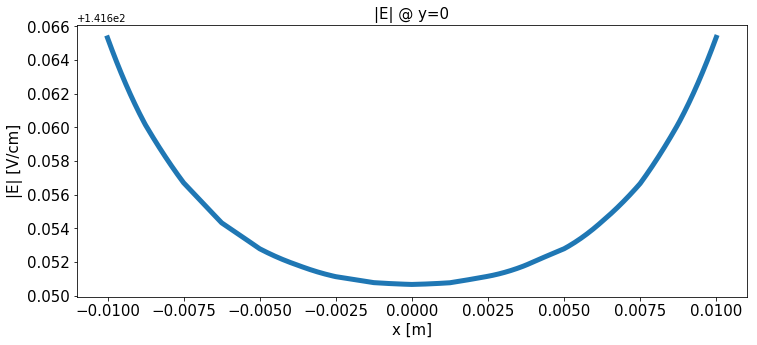

In [34]:
fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'|E| @ y=0')
ax.plot(xx[xc,:], Emag[xc,:]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('|E| [V/cm]');

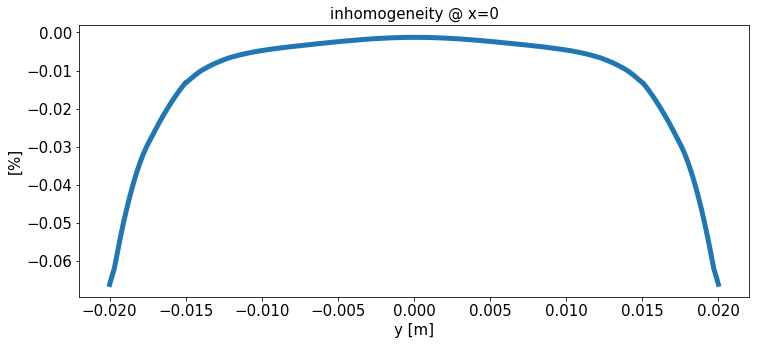

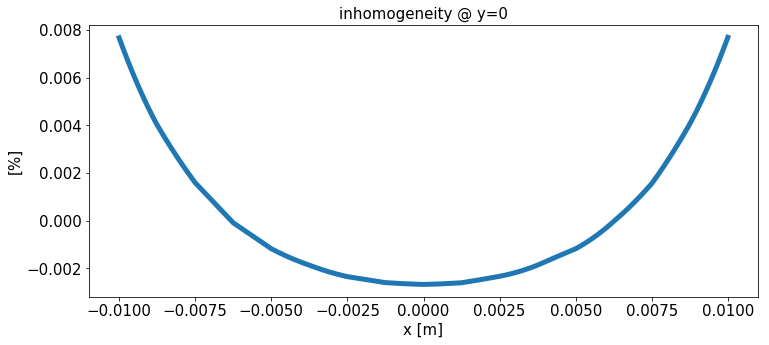

In [35]:
fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'inhomogeneity @ x=0')
ax.plot(yy[:,yc], 100*(Emag[:,yc]-Emag.mean())/(Emag.mean()), lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('y [m]')
ax.set_ylabel('[%]');

fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'inhomogeneity @ y=0')
ax.plot(xx[xc,:], 100*(Emag[xc,:]-Emag[xc,:].mean())/(Emag[xc,:]), lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('[%]');